In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
train[train.TARGET==1].head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
11,59913108,1,26,1,0,0,0,0,Среднее специальное,Не состоял в браке,...,0,1,2,1,13,0,0,0,0,NaN
12,59913134,1,62,0,1,0,3,0,Среднее,Гражданский брак,...,0,1,1,1,3,0,0,0,0,NaN
15,59913542,1,41,1,0,1,0,0,Высшее,Разведен(а),...,0,1,1,1,4,0,0,0,0,NaN
18,59913736,1,34,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,1,1,5,1,1,"1439,94","1439,94",NaN
27,59914760,1,31,1,0,1,1,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,5760,5760,NaN


In [11]:
y = train['TARGET']

In [12]:
train = train.drop('TARGET', axis=1)

In [13]:
train.shape

(15223, 51)

In [14]:
# соеденим train и test

In [15]:
all_data = pd.concat([train, test])

In [16]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [17]:
# посмотрим типы данных и их заполняемость

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [19]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [20]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Ученая степень', 'Среднее специальное', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Страхование', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Государственная служба', 'Образование', 'Энергетика', 'Информационные услуги', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Маркетинг', 'Подбор персонала', 'Логистика', 'Строительство', 'Транспорт', 'Недвижимость', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Наука', 'Торговля', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Туризм', 'Информационные технологии', 'Салоны красоты и здоровья', 'Сборочные производства'}

GEN_TITLE
{'Р

In [21]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [22]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# причина же что использовалась запятая для разделения не целой части числа

In [24]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [25]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [26]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Неоконченное высшее', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Ученая степень', 'Среднее специальное', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Страхование', 'Банк/Финансы', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Управляющая компания', 'СМИ/Реклама/PR-агенства', 'Ресторанный бизнес/Общественное питание', 'Государственная служба', 'Образование', 'Энергетика', 'Информационные услуги', 'Здравоохранение', 'Юридические услуги/нотариальные услуги', 'Маркетинг', 'Подбор персонала', 'Логистика', 'Строительство', 'Транспорт', 'Недвижимость', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Наука', 'Торговля', 'Развлечения/Искусство', 'Коммунальное хоз-во/Дорожные службы', 'Химия/Парфюмерия/Фармацевтика', 'Другие сферы', 'Туризм', 'Информационные технологии', 'Салоны красоты и здоровья', 'Сборочные производства'}

GEN_TITLE
{'Р

# Данные готовы, теперь вам предлагается начать решать задачу

In [27]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [28]:
for i in all_data.columns: 
    if str(all_data[i].dtype) != 'object':                
        all_data[i].fillna(all_data[i].median(), inplace=True) 

In [29]:
# Как поступить со строковыми переменными?

# Ваш код :-)
all_data = pd.get_dummies(all_data, columns=[column for column in all_data.columns if str(all_data[column].dtype) == 'object'])

In [30]:
# В итоге должны получиться данные без пропусков и только числовые
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 443 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 20.4 MB


In [31]:
all_data.isna().any().any()

False

In [32]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train, test = (all_data[:15223], all_data[15223:])

In [33]:
(train.shape, test.shape)

((15223, 443), (14910, 443))

In [34]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split
random_state = 42
# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=random_state)

C:\Users\unifam.OFFICE\AppData\Local\Continuum\anaconda2\envs\p36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
classifiers = {
'tree':  {'classifier': DecisionTreeClassifier(random_state=random_state)},
'forest': {'classifier':  RandomForestClassifier(random_state=random_state)},
'logit': {'classifier': LogisticRegression(random_state=random_state)}
}

In [36]:
for key, value in classifiers.items():
    value['classifier'].fit(X_train, y_train)
    value['prediction'] = value['classifier'].predict(X_test)
    value['prediction_proba'] = value['classifier'].predict_proba(X_test)

In [37]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve
# Ваш код :-)

for key, value in classifiers.items():    
    value['precision'] = precision_score(y_test, value['prediction'])
    value['recall'] = recall_score(y_test, value['prediction'])
    value['accuracy'] = accuracy_score(y_test, value['prediction'])
    value['p_r_curve'] = precision_recall_curve(y_test, value['prediction_proba'][:, 1])
    
#логистическая регрессия не может предсказать ни одного положительного отклика. 
#Из-за этого функция оценки точности возвращает 0 и показывает предупреждение

C:\Users\unifam.OFFICE\AppData\Local\Continuum\anaconda2\envs\p36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


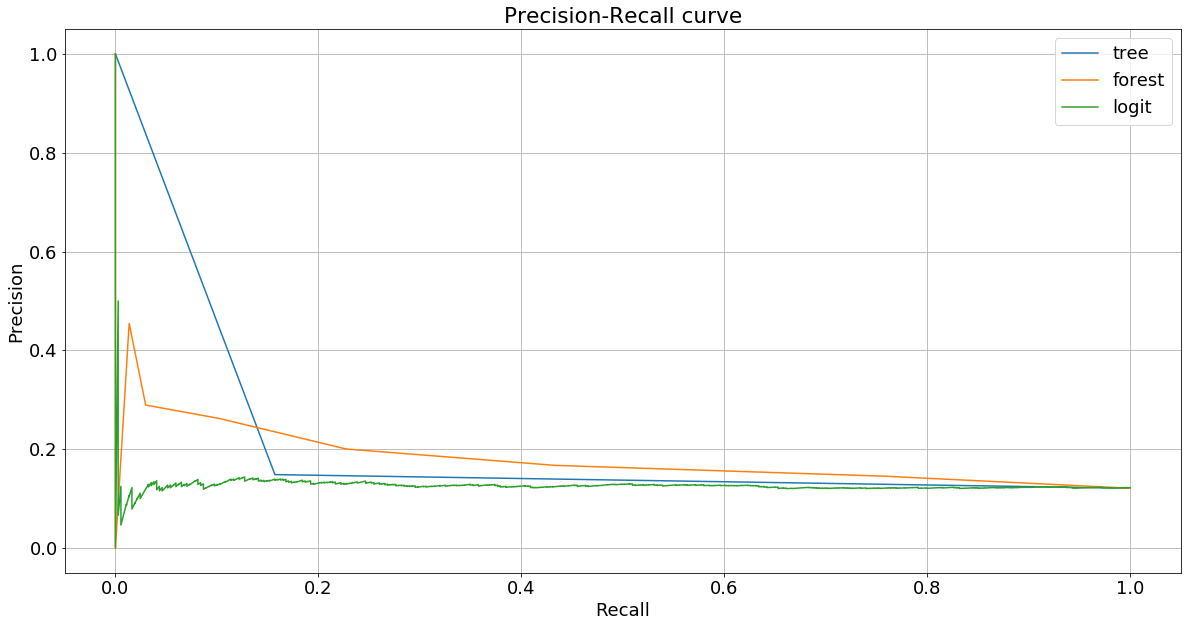

In [38]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)
from matplotlib import pyplot as plt
%matplotlib inline

plt.rc('font', **{'size'   : 18})

fig, ax = plt.subplots(figsize=(20, 10))
for key, value in classifiers.items():
    plt.plot(value['p_r_curve'][1], value['p_r_curve'][0], label=key)    
    

plt.legend()
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall curve')
plt.grid(True)

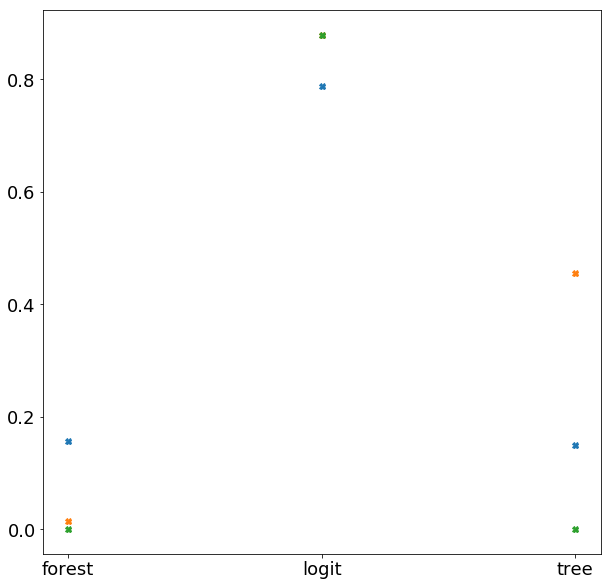

In [91]:
labels = []
values = []
for key, value in classifiers.items():
    labels.append(key)
    #print([value['precision'],  value['recall'], value['accuracy']])
    values.append([value['precision'],  value['recall'], value['accuracy']])

fig, ax = plt.subplots(figsize=(10, 10))
for row in range(len(values)):
    plt.plot(labels, values[row], 'X')

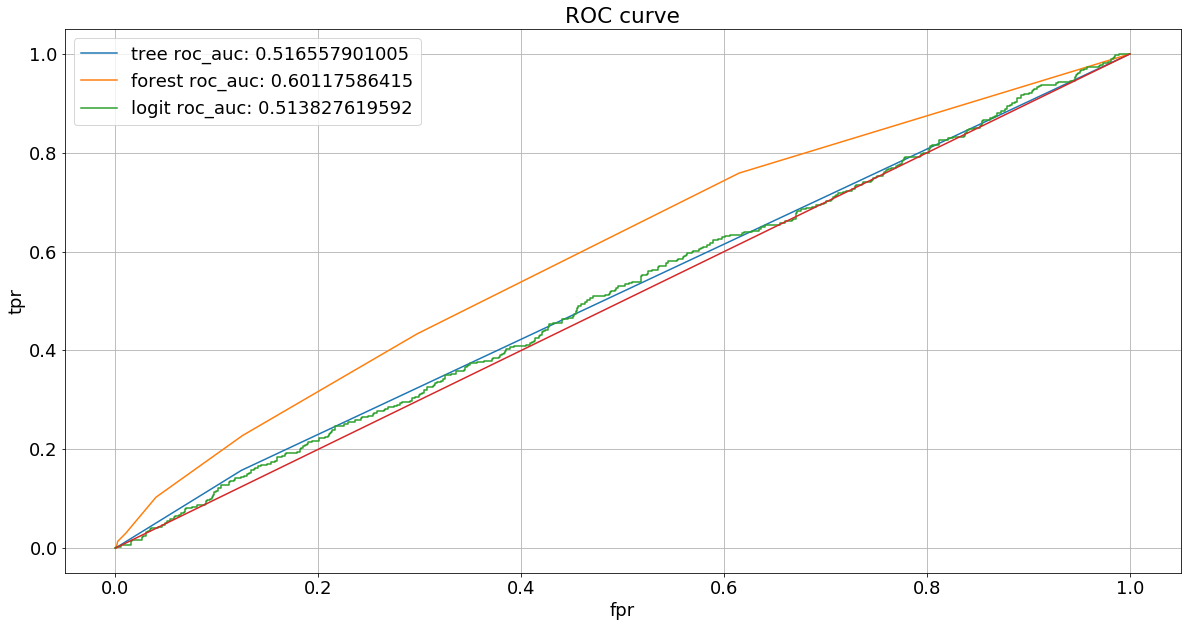

In [45]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
from sklearn.metrics import roc_auc_score, roc_curve

fig, ax = plt.subplots(figsize=(20, 10))

for key, value in classifiers.items():
    value['roc_curve'] = roc_curve(y_test, value['prediction_proba'][:,1])
    plt.plot(value['roc_curve'][0], value['roc_curve'][1], 
             label=key+' roc_auc: '+str(roc_auc_score(y_test, value['prediction_proba'][:,1])))
    
    
plt.legend()
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.title('ROC curve')
plt.grid(True)

In [40]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)
from sklearn.cross_validation import cross_val_score

for key, value in classifiers.items():
    value['cv_score'] = cross_val_score(
        value['classifier'],
        train,
        y,
        scoring='roc_auc',
        cv=10
)

In [41]:
best = float()
best_key = str()
for key, value in classifiers.items():
    if value['cv_score'].mean() > best: 
        best = value['cv_score'].mean()
        best_key = key
print(best_key)

forest


In [42]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
predicion_proba = classifiers[best_key]['classifier'].predict_proba(test)

In [43]:
predicion_proba

array([[ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       ..., 
       [ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0.8,  0.2]])